Process
- 파일 불러오기
- 파일을 읽어서 단어사전(corpus)만들기
- 단어별로 Index 만들기
- 만들어진 인덱스로 문서별로 Bag of words vector생성
- 비교하고자 하는 문서 비교하기
- 얼마나 맞는지 측정하기

In [191]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [192]:
import os

파일 불러오기

In [193]:
def get_file_list(dir_name):
    return os.listdir(dir_name)     # 파일 폴더명을 입력하면 파일들을 listdir 파이썬 built in module을 이용하여 return함

파일별로 내용읽기

In [194]:
def get_conetents(file_list):
    y_class = []
    X_text = []
    class_dict = {
        1: "0", 2: "0", 3:"0", 4:"0", 5:"1", 6:"1", 7:"1", 8:"1"}   # 0: 야구, 1: 축구로 변환

    for file_name in file_list:
        try:
            f = open(file_name, "r",  encoding="cp949")     # cp949: windows, utf-8: Mac
            category = int(file_name.split(os.sep)[1].split("_")[0])    # category는 파일명 앞 번호(1~8)를 통해 분류
            y_class.append(class_dict[category])    # y_class: 
            X_text.append(f.read())     # X_text: 파일내용
            f.close()
        except UnicodeDecodeError as e:
            print(e)
            print(file_name)
    return X_text, y_class

In [195]:
    print(file_list)

['news_data/2_Dodgers left with questions after latest Hyun-Jin Ryu setback.txt', 'news_data/1_Dae-Ho Lee walk-off homer gives Mariners 4-2 win over Rangers.txt', 'news_data/2_Dodgers unsure when Hyun-Jin Ryu will throw another bullpen session.txt', 'news_data/8_Top five matchups in 2018 AFC World Cup final round qualification.txt', 'news_data/3_Seung-hwan Oh off to a great start.txt', 'news_data/3_SEUNG-HWAN OH SHUTS DOWN TWINS IN FIRST SPRING ACTION.txt', 'news_data/6_Borussia Dortmund sign Korea defender Park Joo-ho from Mainz.txt', 'news_data/3_Korean reliever Seung-hwan Oh has the best nickname for a closer.txt', 'news_data/1_Seattle Mariners_ Newest Signing Dae-Ho Lee Could Become Fan Favorite.txt', 'news_data/3_Oh Seung-hwan Could Lose Contract Over Gambling Scandal.txt', 'news_data/8_Tottenham vs Southampton player ratings Heung-min Son shines but Ryan Mason disappoints.txt', 'news_data/5_ S. Korea look well-positioned to qualify for 2018 World Cup.txt', 'news_data/5_Korean Foo

In [196]:
    print(X_text)   # X_text: 파일 내용

['LOS ANGELES -- The Los Angeles Dodgers no longer need to worry about left-hander Hyun-Jin Ryu opting out of his contract after next season. But they might need to start wondering if he’ll ever pitch for them again.\n\nDodgers manager Dave Roberts revealed before Saturday’s game against the visiting San Francisco Giants that Ryu had another physical setback, this time a groin strain that forced him to cancel his bullpen session. Ryu hasn’t pitched in a regular-season game since Oct. 6, 2014, a 3-1 loss to the St. Louis Cardinals in Game 3 of the National League Division Series. He dealt with on-and-off soreness in his throwing shoulder his first two seasons with the Dodgers, and the issue became especially problematic when he reported to spring training in 2015. He eventually underwent surgery to repair a torn labrum on May 21.\n\n\nHyun-Jin Ryu\'s health appears to be an issue again for the Dodgers. AP Photo/Mark J. Terrill\nRyu began his throwing program Oct. 6, a year to the day af

In [197]:
    print(y_class)  # y_class: 파일별 category

['0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0']


의미없는 문장부호 제거, 소문자 변환

In [198]:
def get_cleaned_text(text):
    import re
    text = re.sub('\W+','', text.lower() )      # 문자+숫자(alphanumeric)가 아닌 문자와 매치
    return text

In [199]:
get_cleaned_text("asdSDASwa-dqw-daxc-asc-qwaASF")

'asdsdaswadqwdaxcascqwaasf'

Corpus 만들기 + 단어별 index 생성하기

In [200]:
def get_corpus_dict(text):
    text = [sentence.split() for sentence in text]      # 80개의 파일 text를 단어별로 split()한다
    cleaned_words = [get_cleaned_text(word) for words in text for word in words]

    from collections import OrderedDict
    corpus_dict = OrderedDict()     # OrderedDict(): 
    for i, v in enumerate(set(cleaned_words)):  # 중복없이 각 단어들에 index를 부여함
        corpus_dict[v] = i
    return corpus_dict

In [201]:
    print(get_corpus_dict(X_text))

OrderedDict([('', 0), ('ranch', 1), ('rbis', 2), ('augment', 3), ('indianapolis', 4), ('saturday', 5), ('footballer', 6), ('tuchels', 7), ('banned', 8), ('ben', 9), ('ryus', 10), ('50', 11), ('interesting', 12), ('1720', 13), ('gave', 14), ('25', 15), ('allbut', 16), ('defense', 17), ('yankees', 18), ('sizzling', 19), ('were', 20), ('classic', 21), ('struggling', 22), ('york', 23), ('regional', 24), ('29yearold', 25), ('encounter', 26), ('kimchi', 27), ('rightfully', 28), ('cramp', 29), ('encouraging', 30), ('management', 31), ('quarterfinals', 32), ('notably', 33), ('lay', 34), ('fourseam', 35), ('suspected', 36), ('backoff', 37), ('posting', 38), ('2013', 39), ('yellow', 40), ('obtaining', 41), ('cactus', 42), ('marking', 43), ('watch', 44), ('monaco', 45), ('respect', 46), ('turf', 47), ('jan', 48), ('bentalebs', 49), ('clashes', 50), ('opposing', 51), ('curveball', 52), ('rose', 53), ('450', 54), ('casinos', 55), ('offseason', 56), ('rehabbing', 57), ('negotiate', 58), ('offensive'

문서별로 Bag of words vector 생성

In [202]:
def get_count_vector(text, corpus):
    text = [sentence.split() for sentence in text]
    word_number_list = [[corpus[get_cleaned_text(word)] for word in words] for words in text]
    X_vector = [[0 for _ in range(len(corpus))] for x in range(len(text))]  # 80 * 4024

    for i, text in enumerate(word_number_list):
        for word_number in text:
            X_vector[i][word_number] += 1   # 각 문서들에 포함된 단어의 index를 표시
    return X_vector

In [203]:
    X_vector = get_count_vector(X_text, corpus)
    print(X_vector)
    print(corpus)

[[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 3, 17, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

비교하기  
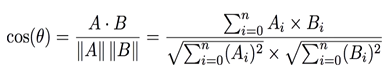

In [204]:
import math
def get_cosine_similarity(v1,v2):
    "compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]
        y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

In [205]:
def get_similarity_score(X_vector, source):
    source_vector = X_vector[source]
    similarity_list = []
    for target_vector in X_vector:
        similarity_list.append(get_cosine_similarity(source_vector, target_vector))
    return similarity_list

In [206]:
def get_top_n_similarity_news(similarity_score, n):
    import operator
    x = {i:v for i, v in enumerate(similarity_score)}       # similarity_score로 정렬
    sorted_x = sorted(x.items(), key=operator.itemgetter(1))

    return list(reversed(sorted_x))[1:n+1]      # 상위 10개 항목 return

In [207]:
    print(get_top_n_similarity_news(similarity_score, 10))

[(28, 0.8480553460187706), (32, 0.8132153370641151), (3, 0.8102804809347028), (40, 0.7997348864589572), (69, 0.7910050550457194), (8, 0.7771900250191583), (35, 0.7728692962186476), (1, 0.772739368041193), (7, 0.7689631450748508), (10, 0.7623361654767182)]


In [208]:
def get_accuracy(similarity_list, y_class, source_news):
    source_class = y_class[source_news]

    return sum([source_class == y_class[i[0]] for i in similarity_list]) / len(similarity_list)

In [209]:
if __name__ == "__main__":
    dir_name = "news_data"
    file_list = get_file_list(dir_name)
    file_list = [os.path.join(dir_name, file_name) for file_name in file_list]      # OS별 디렉토리 주소 표기법이 다르므로 os.path를 통해 경로를 지정한다
    # file_list: 파일(80개)에 대한 list(폴더명, 파일명)
    X_text, y_class = get_conetents(file_list)

In [210]:
    corpus = get_corpus_dict(X_text)
    print("Number of words : {0}".format(len(corpus)))
    X_vector = get_count_vector(X_text, corpus)
    print(X_vector)
    source_number = 10

Number of words : 4024
[[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 3, 17, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [211]:
    result = []
    for i in range(80):
        source_number = i   # 0 ~ 80 까지 비교

        similarity_score = get_similarity_score(X_vector, source_number)
        similarity_news = get_top_n_similarity_news(similarity_score, 10)   # 가장 유사한 값 10개
        accuracy_score = get_accuracy(similarity_news, y_class, source_number)
        result.append(accuracy_score)
        # print(similarity_news)
    print(result)
    print(sum(result) / 80)
    

[0.6, 0.7, 0.8, 0.4, 0.8, 0.6, 0.8, 0.6, 0.6, 0.7, 0.6, 0.7, 0.6, 0.7, 0.4, 0.6, 0.6, 1.0, 0.7, 1.0, 0.6, 0.5, 0.7, 0.8, 0.8, 0.2, 0.8, 0.9, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.6, 0.7, 0.8, 0.7, 1.0, 0.7, 0.8, 0.7, 0.9, 0.8, 0.7, 0.8, 0.7, 0.8, 0.7, 0.8, 0.8, 0.8, 0.8, 0.7, 0.4, 0.8, 0.9, 0.7, 0.7, 0.5, 0.8, 0.8, 0.7, 0.8, 0.6, 0.8, 0.8, 0.7, 0.6, 0.7, 0.6, 0.8, 0.9, 0.6, 0.4, 0.5, 0.7, 0.4, 0.7, 0.8]
0.6949999999999998


In [212]:
!pwd

/content
